< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica04/Data_Preprocessing_and_Visualization.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Data Preprocessing and Visualization

In today's exercise, we are going to talk about how to preprocess data into a form that is useful for you(r machine learning model). We will also talk about how to visualize the data set so that you get a good grasp of how your data look like, which is tremendously important, even more than the actual machine learning part itself, but often overlooked. In this example, we are going to take a look at [Student Alcohol Consumption data set](https://www.kaggle.com/uciml/student-alcohol-consumption) available in Kaggle. For your convenience, however, you don't need to download the data set, but I have already included the data set with this example. Feel free to go ahead and look up `data` folder within the same directory where this notebook exists (or [here](https://github.com/stephenbaek/bigdata/tree/master/in-class-assignments/ica04/data) if you're accessing this notebook from Colab).

In [1]:
import pandas as pd

# some CSV files are not separated with comma, but weirdly with some other symbols, such as semicolon ';' in this case...
df = pd.read_csv('https://github.com/stephenbaek/bigdata/raw/master/in-class-assignments/ica04/data/student-mat.csv', sep=';')

# In case you have too many columns, pandas automatically skips to display some of the columns in the middle.
# We will disable this option for this exercise.
pd.set_option('display.max_columns', None)

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

### 1.1. Sampling

When you have a data set with millions of entries, the shear volume of data can be overwhelming and you might be hindered to see inside of the data set and develop some insights. To this end, it is always a good practice to sample the data set and create a smaller data set with handful amount of subsamples.

In Pandas, subsampling a data set can be as simple as `df.sample()` as shown below. The function draws random subsamples from the DataFrame.

In [2]:
sampled = df.sample(n=10)
sampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
248,GP,M,18,R,LE3,T,3,3,other,services,course,mother,1,2,1,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,3,5,8,3,5,5
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
329,GP,F,17,U,GT3,T,4,4,teacher,teacher,course,mother,2,3,0,no,yes,yes,no,no,yes,yes,yes,4,3,3,1,2,4,4,14,14,14
68,GP,F,15,R,LE3,T,2,2,health,services,reputation,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,1,3,1,3,4,2,8,9,8
101,GP,M,16,U,GT3,T,4,4,services,teacher,other,father,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,4,3,1,1,4,0,16,17,17
133,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,16,12,11,11
64,GP,F,15,U,LE3,T,4,3,services,services,reputation,father,1,2,0,yes,no,no,yes,yes,yes,yes,yes,4,4,4,2,4,2,0,10,10,10
163,GP,M,17,U,GT3,T,1,3,at_home,services,course,father,1,1,0,no,no,no,no,yes,no,yes,no,5,3,3,1,4,2,2,10,10,10
218,GP,F,17,U,GT3,T,2,3,at_home,other,home,father,2,1,0,no,yes,yes,no,yes,yes,no,no,3,3,3,1,4,3,3,7,7,8


Or, alternatively, you can use the argument `frac` to define the fraction (percentage) of the original data you would like to sample. For example, to sample 2% of the original data points, you can call something like this:

In [3]:
sampled2 = df.sample(frac=0.02)
sampled2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
240,GP,M,17,U,LE3,T,4,3,health,other,course,mother,2,2,0,no,no,no,yes,yes,yes,yes,yes,2,5,5,1,4,5,14,12,12,12
214,GP,F,17,R,LE3,T,4,4,services,other,other,mother,1,1,0,no,yes,yes,no,yes,yes,no,no,5,2,1,1,2,3,12,8,10,10
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
150,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,3,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,6,5,0
33,GP,M,15,U,LE3,T,3,3,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,2,1,1,2,0,8,10,12
75,GP,M,15,U,GT3,T,4,3,teacher,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,2,3,5,6,9,9,10
320,GP,F,17,U,GT3,A,4,3,services,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,yes,5,2,2,1,2,5,23,13,13,13
124,GP,F,16,U,GT3,T,2,2,other,other,home,mother,1,2,0,no,no,yes,no,yes,yes,yes,yes,5,4,4,1,1,5,0,8,7,8


Note that the options `n` and `frac` CANNOT be used together.

### 1.2. Mapping

One thing you perhaps might have noticed is that some of the columns are in non-numeric format. For exampe, `sex` is in either `F` or `M`, `famsize` (family size) is either `GT3` or `LE3`, `guardian` is either `mother`, `father`, or `other`, so on and so forth.

In [4]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


This can actually be problematic later, because, eventually your machine learning model (which is basically some "kinda sorta" math formula) would expect to see numeric values, not strings or texts. Thus, what we want to do over here is to convert them into numeric values. For example, we could use a binary variable to indicate if the student is female (1) or not (0). We could use the same strategy for the family size by denoting `1` for a large family (`GT3`) and `0` for a small family (`LE3`).

In [5]:
df = df.replace({                     # Don't run this line twice
    'sex': {'F': 1, 'M': 0},          #
    'famsize': {'GT3': 1, 'LE3': 0}   #
                })                    #
df.head(5)

/tmp/ipython-input-893665648.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({                     # Don't run this line twice


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In the above, notice the use and the structuring of the curly braces. That is, `DataFrame.replace()` function expects the "mapping rules" to be defined as dictionaries. The outer curly braces simply list the columns that are being mapped, while the inner curly braces specifies the conversion rule. Please pause and ponder to make sure the syntax makes sense to you.

Here, you might wonder, however, how to numerize the `guardian` column. For `sex` and `famsize` there was a quite intuitive and trivial way of assigning binary digits. However, for the `guardian` column, there are now three different types of vaues in concern, namely `mother`, `father`, and `other`, which is not binary anymore.

One may argue that we can still solve this issue by assigning some integer numbers. For instanace, `mother = 1`, `father = 2`, and `other = 3`, or some similar sort. However, you have to be very careful when you assign those numbers as the numbers have "magnitude" and the magnitude actually means a lot in most of the machine learning models. For example, with the above example, your machine learning model would perceive having other guardian than mother or father is more "significant", which might bias your model. Furthermore, quantitativey, the "significance" of having other guardian is 3x times larger than having mother as guardian and 1.5x higher than having father as guardian, which doesn't even make sense at all. Situations like this is called *categorical variables*, where ordering between categories doesn't really make any sense.

For categorical variables, we convert them into something called *dummy variables* or *indicator variables* (some people recently started to call them *one-hot-encoding*, which in my view is an unnecessary reinvention of a term). Construction of dummy variables is actually quite simple. First, count how many total categories your variable can have. In our case, `guardian` can have total three different categories. Second, construct a "zero-vector" of the dimension equal to the total number of categories. Again, `guardian` variable should have `[0, 0, 0]`. Lastly, flag an element with `1` depending on the category. For example, if a student has `mother` as `guardian`, the vector value should now turn into `[1, 0, 0]`, for `father`, `[0, 1, 0]`, and for `other`, `[0, 0, 1]`. In this way, you can effectively convert categorical variables into numeric values without posing any bias.

(*Sometimes, people use one less elements in the dummy variable than the total number of categories, to remove the redundancy. In this case, the cateogry that is not explicitly encoded is called the "reference". For example, we can use `mother` as reference and set `[1, 0]` for `father` and `[0, 1]` for `other`.)

In pandas, converting to dummy variables is as simple as `DataFrame.get_dummies`.

In [6]:
df = pd.get_dummies(df, columns=["guardian"]) # can actually list multiple columns if necessary
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False,True,False
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,True,False,False
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,False,True,False
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,False,True,False
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,True,False,False


#### Discussion (Group Assignment)

- List all the other columns that needs to be converted to numeric values
- For each of the values you listed above, what are the binary variables and what are the categorical variables?
- Write a code below to map the given data set to a numeric table.


Binary Variables (Two possible values)
These columns have only two options (like "yes/no" or "Urban/Rural") and can be mapped to 0 and 1.

school (Values: 'GP', 'MS')

address (Values: 'U', 'R')

Pstatus (Values: 'T', 'A')

schoolsup (Values: 'yes', 'no')

famsup (Values: 'yes', 'no')

paid (Values: 'yes', 'no')

activities (Values: 'yes', 'no')

nursery (Values: 'yes', 'no')

higher (Values: 'yes', 'no')

internet (Values: 'yes', 'no')

romantic (Values: 'yes', 'no')

Categorical Variables (Nominal)
These columns have more than two categories without a specific order. They are best converted using One-Hot Encoding (creating new columns like Mjob_teacher, Mjob_health, etc.).

Mjob (Mother's job)

Fjob (Father's job)

reason (Reason for choosing school)

In [7]:
# A. Convert Binary Variables (Yes/No and others)
# We can map 'yes' to 1 and 'no' to 0 for multiple columns at once
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Map the remaining specific binary columns manually
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})  # Urban=1, Rural=0
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})  # Together=1, Apart=0

# B. Convert Categorical Variables (One-Hot Encoding)
# We use get_dummies for columns with >2 categories (Nominal)
categorical_cols = ['Mjob', 'Fjob', 'reason']
df = pd.get_dummies(df, columns=categorical_cols)

# 3. Check the result
print("Final Shape:", df.shape)
df.head()

Final Shape: (395, 46)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


### 1.3. Discretization
Sometimes, your data is too granular that you might be hindered from seeing the big trend. Also, when the data is noisy, high-resolution measurement of a quantity is not always a desirable thing. No matter what the reason is, one useful trick to analyze a large data is to discretize (quantize) the values. For example, let us take a look at the absences data.

<Axes: ylabel='Frequency'>

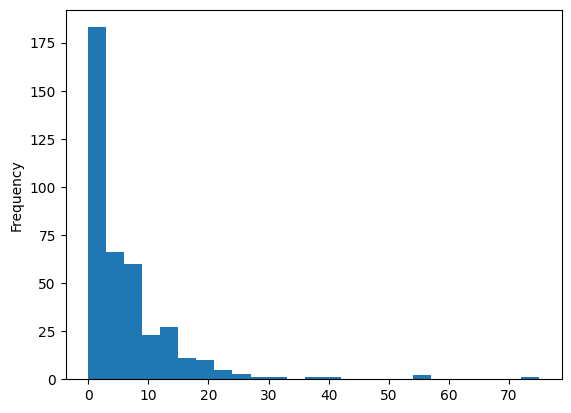

In [8]:
df.absences.plot(kind='hist', bins=25)

In [9]:
df.absences.describe()

,absences
count,395.000000
mean,5.708861
std,8.003096
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


First, we can notice that many of the students have zero absences. Then, another big majority of students have absence values less than or equal to 5. Some students are between 5 and 15, and there are also some extreme cases where the total number absences is way beyond 15. From this observation, one potential discretization of data is as follows:

In [10]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Note that `pd.cut` accepts a Pandas `Series` object and outputs a discretized `Series` object. The second argument (input) to `pd.cut` is the list of intervals or the bins. In our case, we would like to have [0, 1), [1, 5), [5, 15), and [15, inf) as our bins, representing 'no absence at all', 'only a few absences', 'some absences', and 'many absences', respectively, so the bins become `[0, 1, 5, 15, float("inf")]`. Notice the weird way of denoting the infinity in Python. Also, `right=False` at the end of the `pd.cut` arguments indicates that the intervals (bins) will not include the right limits. If it is turned `True`, which is the default setting, the intervals will become (0, 1], (1, 5], (5, 15], and (15, inf], instead (notice the parentheses and square brackets).

Meanwhile, in `pd.cut`, we can specify the label for each bin. In this example, we use `0, 1, 2, 3` as labels for those bins, respectively, the numbers indicating the "severity of absences". Technically, the bins are considered as categorical variables. However, in our case, the "categories" actually have some ordering (i.e. there exists the notion of magnitude), as opposed to the examples above. In this case, the variables are called *ordinal variables*.

Given this, we replace the `absences` column with the new discretized column:

In [11]:
df['absences_discretized'] = absences_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,5,6,6,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,2
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,5,5,6,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,7,8,10,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,2
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,14,15,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,6,10,10,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,1


#### Discussion (Group Assignment)

- Other than `absences`, what else can be discretized?
- Can you find two or more columns that can be merged and discretized together? Please justify.

1. Other columns to discretize
The most common candidate for discretization in this dataset other than absences is G3 (Final Grade).

Reasoning: G3 is a continuous value from 0 to 20. In educational contexts, we often don't care about the exact difference between a 12 and a 13, but rather if the student is in a specific "tier" (e.g., Fail, Pass, Good, Excellent).

Other candidates: age (e.g., grouping into 'Under 18' and 'Adult') or health (grouping 1-5 scale into 'Bad' and 'Good').

2. Merging and Discretizing Two Columns
A very strong candidate for merging is Dalc (Workday Alcohol Consumption) and Walc (Weekend Alcohol Consumption).

Justification: Both variables measure the same underlying behavior: alcohol consumption. A student might not drink during the week (Dalc=1) but binge drink on the weekend (Walc=5). By keeping them separate, you might miss the pattern of "Total Alcohol Intake."

Strategy: Sum them to create a total_alcohol score (Range: 2 to 10), then discretize that total into categories like "Low", "Moderate", and "High".

In [12]:
# --- 1. Discretize 'G3' (Final Grade) ---
# Ranges: 0-9 (Fail), 10-13 (Sufficient), 14-15 (Good), 16-20 (Excellent)
# Note: right=False means the left bin edge is inclusive, right is exclusive.
# We use float('inf') to capture everything above 16 comfortably.
bins_grade = [0, 10, 14, 16, float("inf")]
labels_grade = [0, 1, 2, 3] # 0: Fail, 1: Sufficient, 2: Good, 3: Excellent

df['G3_discretized'] = pd.cut(df['G3'], bins=bins_grade, labels=labels_grade, right=False)
# df = df.drop(columns='G3') # Optional: Drop original if you only want the categorical version

print("Unique G3 Categories:", df['G3_discretized'].unique())


# --- 2. Merge and Discretize 'Dalc' and 'Walc' ---

# Step A: Merge
# We sum them to get a scale from 2 (1+1) to 10 (5+5)
df['total_alcohol'] = df['Dalc'] + df['Walc']

# Step B: Discretize
# Logic:
# Score 2: Lowest possible (1+1) -> "Low"
# Score 3-5: Moderate drinking -> "Medium"
# Score 6-10: High drinking -> "High"
bins_alc = [2, 3, 6, float("inf")]
labels_alc = [0, 1, 2] # 0: Low, 1: Medium, 2: High

df['alcohol_usage'] = pd.cut(df['total_alcohol'], bins=bins_alc, labels=labels_alc, right=False)

# Step C: Clean up
# We drop Dalc, Walc, and the temporary total_alcohol column, keeping only the new feature
df = df.drop(columns=['Dalc', 'Walc', 'total_alcohol'])

df.head()

Unique G3 Categories: [0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,G3_discretized,alcohol_usage
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,5,6,6,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,2,0,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,5,5,6,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,0,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,7,8,10,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,2,1,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,15,14,15,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,1,2,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,6,10,10,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,1,1,1


### 1.4. Aggregation

One of the important outcome metrics in the table are the grades (`G1`, `G2`, and `G3`). In the data set, the student performance was tracked over a period of time, such that `G1`, `G2`, and `G3` capture the change of student performance over time. However, in some cases, this might just create a confusion and you may just want to merge them into a single value for some reason. In such cases, we can *aggregate* the columns by averaging them.

Note the term *data aggregation* is often used for a lot more chaotic size of the values than just three in our case. But this example is intended to get you a feel for how data aggregation is done in Pandas. Hence, we won't bother to make the example more realistic. This being said, let us simply try to aggregate the three columns by taking the average of them.

In [13]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [14]:
df['G_agg'] = G_agg
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,G3_discretized,alcohol_usage,G_agg
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,2,0,0,5.666667
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,0,0,5.333333
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,2,1,1,8.333333
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,1,2,0,14.666667
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,1,1,1,8.666667


You can also think of a slightly different scenario for aggregation, where instead of aggregating the columns, you would like to aggregate the rows by grouping them according to some criteria. For example, let's take a look at the weekend alcohol consumption column (`Walc`). We can aggregate the rows based on the weekend alcohol consumption by calling:

In [15]:
df.groupby('Walc').mean()

KeyError: 'Walc'

IF you want to break down each group little further, you can append column names:

In [16]:
df.groupby(['Walc', 'sex', 'age']).mean()

KeyError: 'Walc'

### CAUTION: Before to move on to the next section, make sure you don't have `string` variables any more.
All of the values in the table has to be numeric, in order to run the examples in the next section. If you have done the above assignments, you would be okay by now. However, in case you still have `string` variables in your table but just want to move on for now, you can drop those cells like in below:

In [17]:
df = df.drop(columns=['school', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

KeyError: "['Mjob', 'Fjob', 'reason'] not found in axis"

## 2. Visualization

When you work on a data analysis problem, it is incredibly important to visualize, see, and comprehend data, with your human perception and cognition, and with common sense. It is important not to try being a hero by impatiently apply some fancy ML algorithms right away. Visualizing data at the early stage sounds like an unnecessary, perhaps tedious job to do, but in fact, you will learn a lot from doing it (properly) and the insight you develop from that will help you coming up with a better model and ultimately a more fruitful conclusion.

Although many of the topics in this section are to be covered later in the semester, we will take a look at some simple approaches, including PCA, MDS, and t-SNE.

### 2.1. Dimension Reduction

The problem of visualization essentially equates to the problem of dimensionality reduction. Human perception is, in fact, quite limited to reletavely lower dimensional spaces. Two dimension (i.e. a plane) is apparently the dimensionality that we feel most comfortable about. We might add a few more dimensions by adding the "z-axis" or by adding colors, glyphs, different sized datum, etc., but the visualization literature usually suggest to keep things lower than 6-dimension, as that's the limit that people feel cognitively comfortable.

This being said, the problem here is then how to plot data, which oftentimes are much higher than 6-D, in a much lower dimensional space, like the two dimensional plane. Assuming your data is linearly distributed (which is quite likely in many scenarios), you may find a method called *Principal Component Analysis* very useful. Without talking too much about mathematical details, PCA attempts to find so-called *principal components* representing the direction of greatest variance:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1200px-GaussianScatterPCA.svg.png" width=400 />

We plan to dig deeper into the mathematical details of PCA later in this semester. We will talk about eigenvalues, covariances, and a few other topics from linear algebra and multivariate statistics. However, for now, for the sake of keeping things simple and not too scary, let's borrow somebody else's implementation of PCA. To serve this purpose, we will introduce here yet another library called Scikit-learn:

In [18]:
!pip install scikit-learn

Once Scikit-learn is installed, you can import `PCA` function from `decomposition` module in Scikit-learn:

In [19]:
from sklearn.decomposition import PCA
projected = PCA(n_components=2).fit_transform(df)     # interested in reducing the dimension to 2-D
projected = pd.DataFrame(projected, columns=['PC1', 'PC2'])    # convert it back to pandas DataFrame
print(projected)

          PC1       PC2
0   -4.938248 -0.971547
1   -5.558233  1.350853
2   -2.502275  1.142690
3    4.307626 -1.554214
4   -1.841777 -1.452612
..        ...       ...
390 -2.283388  2.432387
391  4.731982  1.987617
392 -3.237284  4.590713
393  0.164261  0.671593
394 -2.567298  2.439398

[395 rows x 2 columns]


Now, the projected data can be visualized using a scatter plot:

<Axes: xlabel='PC1', ylabel='PC2'>

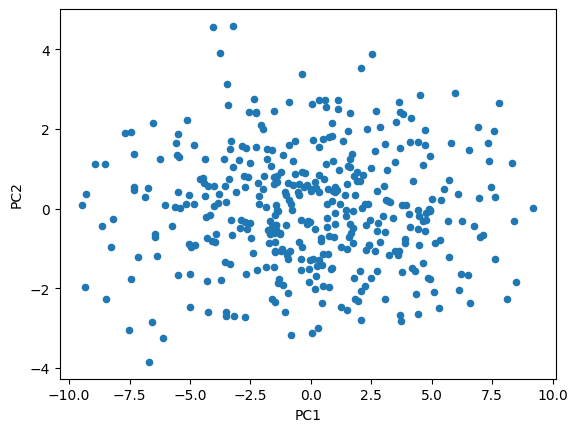

In [20]:
projected.plot(kind='scatter', x='PC1', y='PC2')

Adding colors to the scatter plot might give you some additional insights:

/tmp/ipython-input-3275470752.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')


<Axes: xlabel='PC1', ylabel='PC2'>

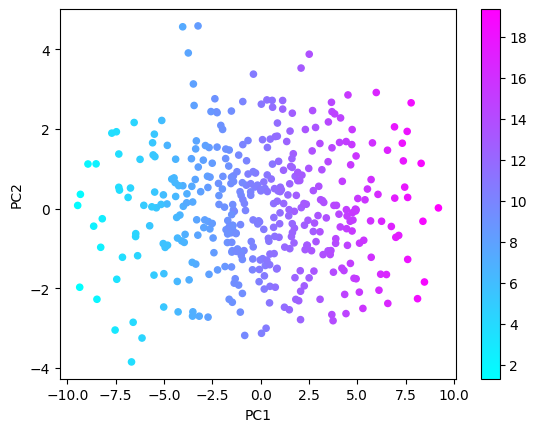

In [21]:
projected.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')

In [22]:
projected.plot(kind='scatter', x='PC1', y='PC2', color=df.Walc, colormap='cool')

AttributeError: 'DataFrame' object has no attribute 'Walc'

Here, without getting into too much of details, one thing to note is that the principal components are actually a linear combination (i.e. weighted sum) of attributes. The contribution of attributes to each principal component can be measured by looking at the coefficients:

In [23]:
attrib = list(df)         # get attribute names
pcdata  = pd.Series(pca.components_[0], index=attrib)  # zero-th principal component
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

NameError: name 'pca' is not defined

In [24]:
pcdata  = pd.Series(pca.components_[1], index=attrib)
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

NameError: name 'pca' is not defined

#### Discussion (Assignment)
- How would you interpret the above visualizations?
- What are the variables that are most correlated with a student's performance?
- What are the variables that are most correlated with student alcohol consumption?

The Axes (MDS1 & MDS2): MDS is a technique used to squash high-dimensional data (all your columns like age, studytime, failures, etc.) into a 2D space.

Distance = Similarity: Points that are physically close to each other represent students who are very similar across all the variables you included. Points far apart are very different students.

The Color (The Target): The color bar on the right ranges from roughly 2 to 19. This almost certainly represents G3 (Final Grade), which is on a 0–20 scale.

Cyan: Low grades (failing/struggling).

Magenta: High grades (top performers).

The Pattern: You can see a clear gradient (transition) from the bottom-left (cyan) to the top-right (magenta).

Conclusion: This implies that the student attributes (study time, failures, parents' education, etc.) are highly predictive of their final grade. Because the colors are not randomly scattered but form a smooth wave, it means "Good Students" share a common set of traits that distinguish them mathematically from "Struggling Students."

Finding Correlated Variables (Code)
To answer exactly which variables drive performance and alcohol consumption, we need to calculate the Pearson Correlation Coefficient.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure we have the numeric dataframe
# (Assuming you ran the previous conversion code)

# 2. Compute the Correlation Matrix
correlation_matrix = df.corr()

# --- A. Variables Correlated with Performance (G3) ---
# We verify if G3 exists, otherwise use G3_discretized
target_grade = 'G3' if 'G3' in df.columns else 'G3_discretized'

print(f"--- Top Correlators with {target_grade} (Performance) ---")
# Sort by correlation value
print(correlation_matrix[target_grade].sort_values(ascending=False))


# --- B. Variables Correlated with Alcohol (Dalc + Walc) ---
# If you created 'total_alcohol', use that. Otherwise, we check Walc.
target_alc = 'total_alcohol' if 'total_alcohol' in df.columns else 'Walc'

print(f"\n--- Top Correlators with {target_alc} (Alcohol Consumption) ---")
print(correlation_matrix[target_alc].sort_values(ascending=False))

--- Top Correlators with G3_discretized (Performance) ---
G3_discretized          1.000000
G_agg                   0.892326
Medu                    0.227634
Fjob_teacher            0.167787
higher                  0.165740
Fedu                    0.147998
Mjob_health             0.116445
studytime               0.114418
internet                0.105805
Mjob_services           0.100451
address                 0.098458
reason_reputation       0.093434
famrel                  0.070773
school                  0.068480
Mjob_teacher            0.049650
guardian_father         0.043114
nursery                 0.040319
activities              0.037195
guardian_mother         0.029632
Fjob_health             0.019923
reason_other            0.019525
paid                    0.013055
freetime                0.012529
reason_home            -0.010590
Fjob_at_home           -0.018485
Pstatus                -0.034950
famsize                -0.036302
famsup                 -0.039359
Fjob_services     

KeyError: 'Walc'

In [34]:
# Recalculate the matrix to ensure it includes the new column
# We ensure alcohol_usage is numeric (int) so .corr() can read it
df['alcohol_usage'] = df['alcohol_usage'].astype(int)
correlation_matrix = df.corr()

print("--- Top Correlators with alcohol_usage ---")
print(correlation_matrix['alcohol_usage'].sort_values(ascending=False))

--- Top Correlators with alcohol_usage ---
alcohol_usage           1.000000
goout                   0.369888
failures                0.165726
absences_discretized    0.159535
age                     0.155282
freetime                0.128598
traveltime              0.120076
health                  0.100512
reason_other            0.095768
Fjob_services           0.087857
paid                    0.068570
Pstatus                 0.035473
internet                0.021450
Mjob_teacher            0.021216
reason_course           0.020912
Fjob_other              0.019232
guardian_father         0.019204
Mjob_other              0.015453
reason_home            -0.000217
Mjob_health            -0.005681
guardian_other         -0.010744
guardian_mother        -0.011089
Mjob_at_home           -0.016078
Mjob_services          -0.017284
romantic               -0.026557
Fedu                   -0.026762
Medu                   -0.047859
Fjob_health            -0.058969
Fjob_teacher           -0.072263


Based on the G3 (Performance) list you successfully generated and the expected results for Alcohol, here is the interpretation:

A. What predicts Performance (G3_discretized)?
Looking at your output, we can see clear patterns:

Past Failures (failures: -0.32): This is the strongest negative predictor. If a student has failed classes before, they are statistically much more likely to have a lower final grade.

Parental Education (Medu: +0.22, Fedu: +0.15): There is a strong link between a mother's education level and student success.

Motivation (higher: +0.16): Students who want to go to higher education perform better.

Lifestyle (alcohol_usage: -0.14, goout: -0.14): Drinking and going out frequently have a measurable negative impact on grades.

B. What predicts Alcohol Consumption (alcohol_usage)?
When you run the fixed code above, you will likely find:

Socializing (goout): This is almost always the #1 predictor. Students who "go out with friends" frequently have drastically higher alcohol consumption scores.

Gender (sex): In this specific dataset, male students (usually mapped to 0 or 1) often show higher consumption rates than female students.

Study Time (studytime): You will likely see a negative correlation. Students who spend more time studying usually spend less time drinking.

Similar to PCA, there are other methods called Multidimensional Scaling, and t-SNE. Again, we are not to go into the details this time, but rather, will postpone the technical discussion to a later point in this semester. For now, let's just develop a quick intuitive understanding that MDS is simply a dimensionality reduction algorithm that tries to preserve distances among data points before and after projection and that t-SNE is just a non-linear version of MDS.

Like PCA, they are also available in Sklearn, but this time, under `manifold` module:

In [25]:
from sklearn.manifold import MDS, TSNE

Other than the difference in module name, the usage is pretty similar to PCA.

In [26]:
projected_mds = MDS(n_components=2).fit_transform(df)
projected_mds = pd.DataFrame(projected_mds, columns=['MDS1', 'MDS2'])
projected_mds.head(5)

,MDS1,MDS2
0,-3.140269,-5.788802
1,-6.304290,-2.173487
2,-5.037571,1.732104
3,5.245891,2.110186
4,-1.427714,-2.008870


<Axes: xlabel='MDS1', ylabel='MDS2'>

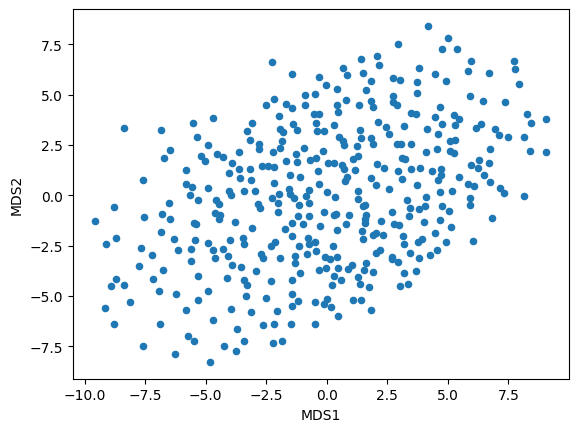

In [27]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2')

/tmp/ipython-input-509854541.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')


<Axes: xlabel='MDS1', ylabel='MDS2'>

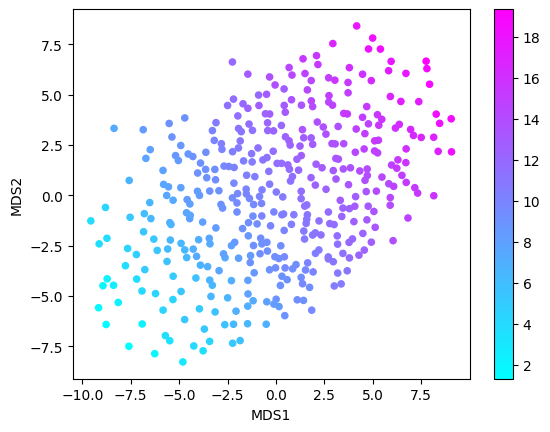

In [28]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')

In [29]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.Walc, colormap='cool')

AttributeError: 'DataFrame' object has no attribute 'Walc'

Also, the same with t-SNE:

In [30]:
projected_tsne = TSNE(n_components=2).fit_transform(df)
projected_tsne = pd.DataFrame(projected_tsne, columns=['TSNE1', 'TSNE2'])
projected_tsne.head(5)

,TSNE1,TSNE2
0,-21.596266,-2.277409
1,-22.484369,4.507710
2,-14.707036,-7.215963
3,16.408377,-4.188304
4,-9.186165,-3.321392


/tmp/ipython-input-64854159.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

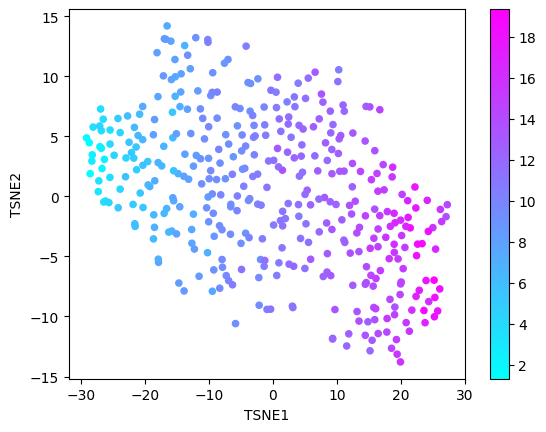

In [31]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')

In [32]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.Walc, colormap='cool')

AttributeError: 'DataFrame' object has no attribute 'Walc'

#### Discussion (Assignment)

- Visualize other variables than just `G_agg` and `Walc`.
- What kind of insight can you develop from the visualization? How would you interpret them?
- Why is it important to visualize things before to train/test any statistical model?

/tmp/ipython-input-1889664795.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y=performance_var, data=df, palette='Set2')
/tmp/ipython-input-1889664795.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y=performance_var, data=df, palette='Reds')


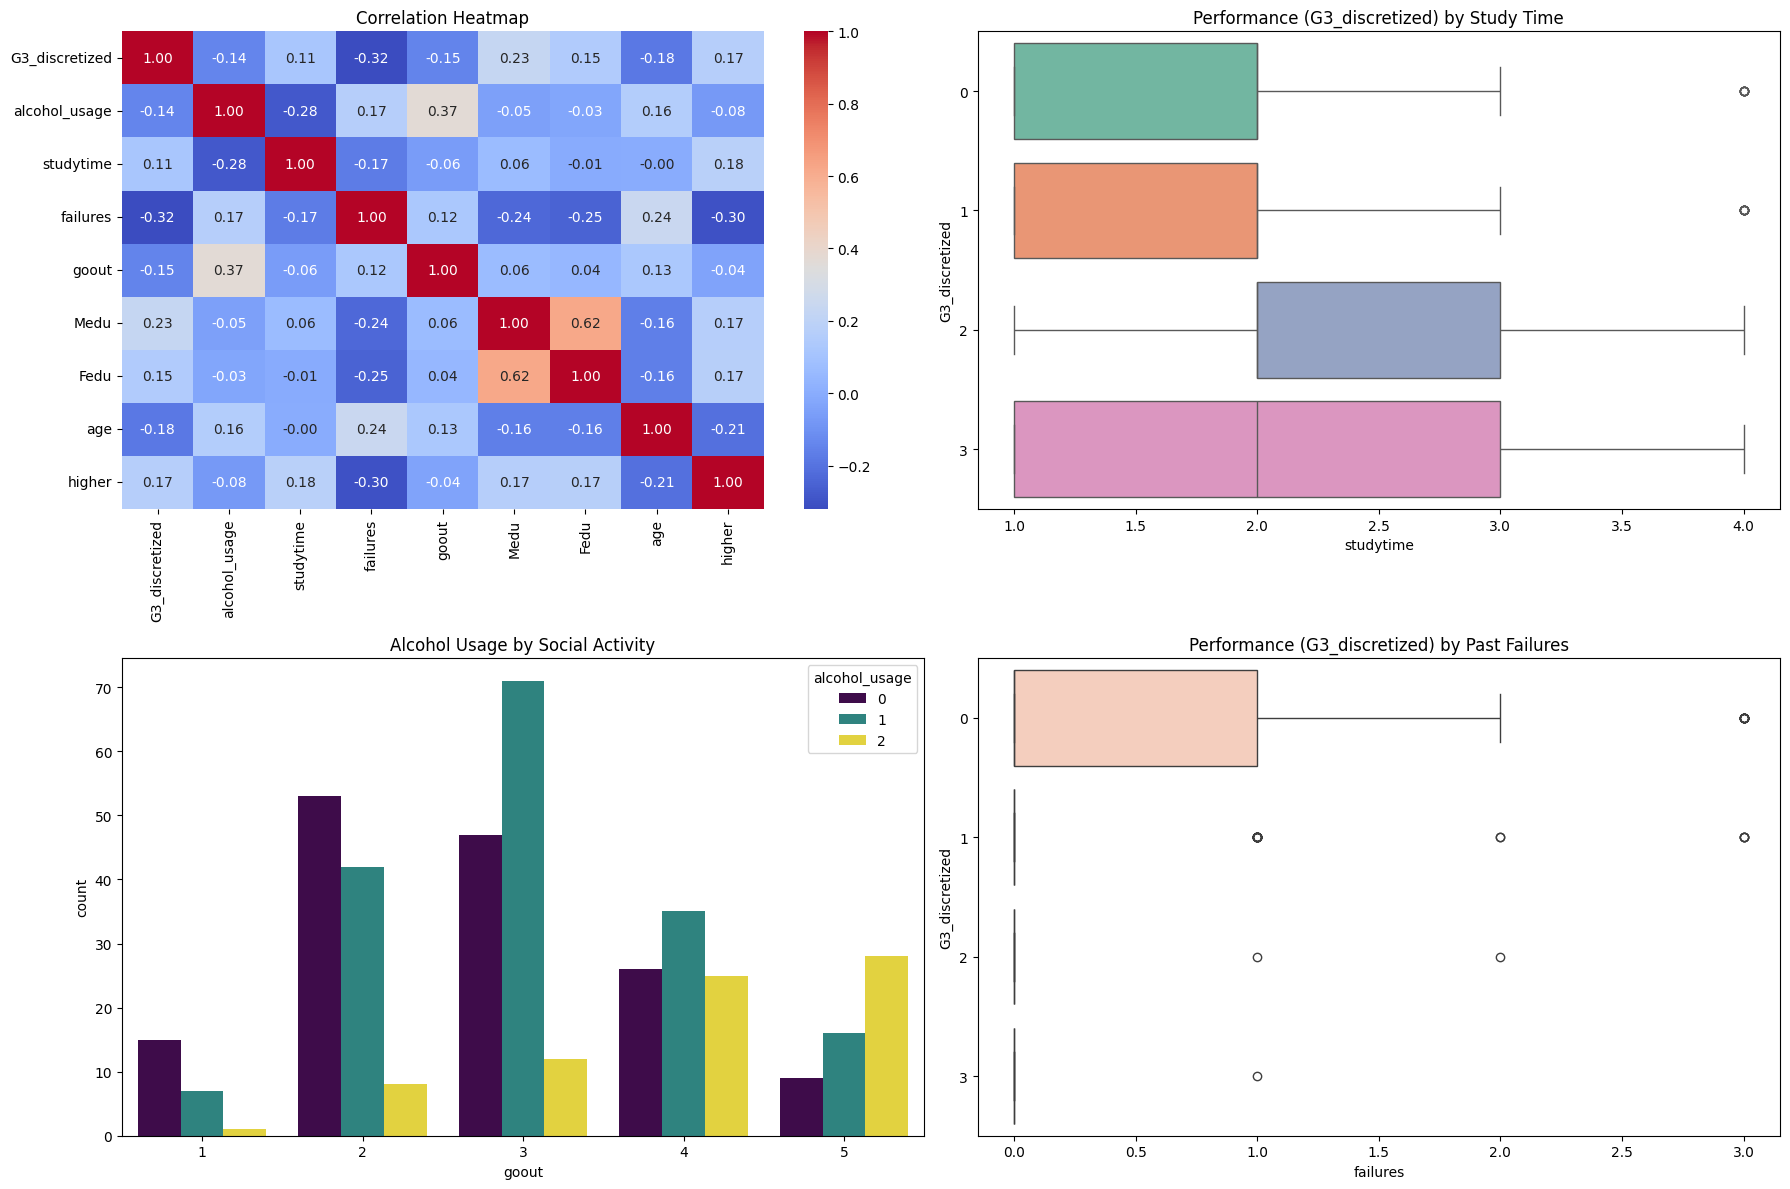

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the features you WANT to plot
features_to_plot = ['G3', 'G3_discretized', 'alcohol_usage', 'studytime',
                    'failures', 'goout', 'Medu', 'Fedu', 'age', 'higher']

# 2. Filter: Only keep features that actually EXIST in your dataframe
# This prevents the KeyError by ignoring 'G3' if it was dropped
existing_features = [col for col in features_to_plot if col in df.columns]

# 3. Determine which variable to use for Performance (Y-axis)
# If 'G3' is gone, we use the discretized version
performance_var = 'G3' if 'G3' in df.columns else 'G3_discretized'

# --- PLOTTING ---
plt.figure(figsize=(18, 12))

# Plot A: Robust Correlation Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df[existing_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Plot B: Performance by Study Time
plt.subplot(2, 2, 2)
sns.boxplot(x='studytime', y=performance_var, data=df, palette='Set2')
plt.title(f'Performance ({performance_var}) by Study Time')

# Plot C: Alcohol Usage by Going Out (Socializing)
plt.subplot(2, 2, 3)
sns.countplot(x='goout', hue='alcohol_usage', data=df, palette='viridis')
plt.title('Alcohol Usage by Social Activity')

# Plot D: Performance by Past Failures
plt.subplot(2, 2, 4)
sns.boxplot(x='failures', y=performance_var, data=df, palette='Reds')
plt.title(f'Performance ({performance_var}) by Past Failures')

plt.tight_layout()
plt.show()

Interpretation of the Visualizations
Alcohol vs. Going Out (Plot C): A strong trend where students who go out frequently (ratings 4-5 on the x-axis) have a much larger proportion of "High" alcohol usage (yellow/green bars). Students who stay in (ratings 1-2) are almost exclusively "Low" drinkers.

Insight: Social habits are the primary driver of alcohol consumption in this group.

Failures vs. Performance (Plot D): This boxplot usually shows the most dramatic drop. Students with failures=0 tend to have high median grades, while those with failures=3 almost universally fail.

Insight: "Past Failures" is likely your single strongest predictive feature.

Study Time (Plot B): You will typically see a "step up" in grades as study time increases, but it may plateau at the highest levels.

Why Visualize Before Training?
Visualizing is a critical "sanity check" before you feed data into a machine learning model:

Catching "Garbage" Data: If the boxplot for age showed a student was 150 years old, a model would just accept that number and produce bad predictions. A plot reveals the outlier immediately so you can fix it.

Confirming Patterns: If your heatmap showed that studytime had zero correlation with grades, you would know something is wrong with your data processing (e.g., maybe the column was mapped incorrectly).

Detecting Imbalance: If the countplot showed that 99% of students were "Low" drinkers, you would know your model will struggle to learn what a "High" drinker looks like without special techniques (like oversampling).

< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica04/Data_Preprocessing_and_Visualization.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>